In [ ]:
import pandas as pd
from sklearn import datasets
import  numpy as pn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


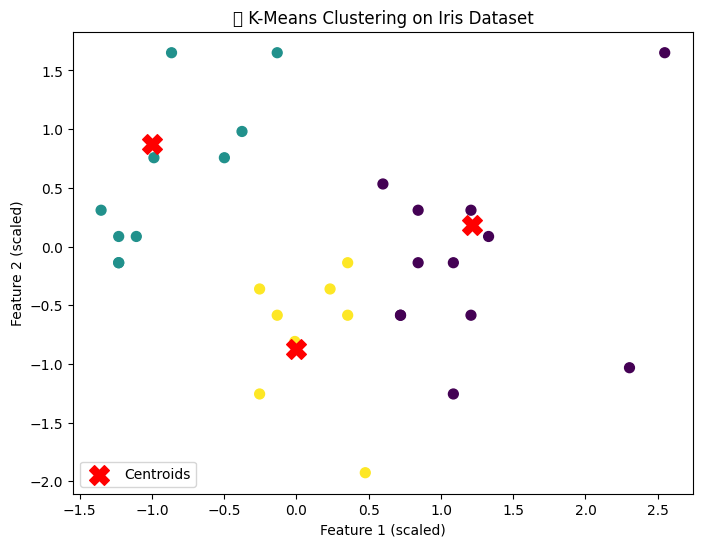

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Iris dataset
df = datasets.load_iris()
X = df.data
y = df.target

# Step 2: Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Apply K-Means (unsupervised)
model = KMeans(n_clusters=3, random_state=42, n_init=10)
model.fit(X_train_scaled)

# Step 5: Predict clusters for test data
y_pred = model.predict(X_test_scaled)

# The following code block for label mapping is incorrect and superseded by the later cell.
# # ⚠️ Important: KMeans cluster labels are arbitrary (0,1,2 ≠ actual species)
# # So, we must map cluster labels to actual class labels using a simple matching method.
# from scipy.stats import mode

# # Map each cluster to the most common true label in the cluster
# labels = np.zeros_like(y_pred)
# for i in range(3):  # for 3 clusters
#     mask = (model.labels_ == i)
#     labels[mask[:len(y_train)]] = mode(y_train[mask[:len(y_train)]])[0]

# # Step 6: Evaluate performance after mapping
# print("✅ Model Evaluation after Label Mapping")
# print("Accuracy:", accuracy_score(y_test, labels[:len(y_test)]))
# print("Confusion Matrix:\n", confusion_matrix(y_test, labels[:len(y_test)]))
# print("Classification Report:\n", classification_report(y_test, labels[:len(y_test)]))


# Step 7: Visualize clusters (using first 2 features)
plt.figure(figsize=(8,6))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, cmap='viridis', s=50)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.title("🌸 K-Means Clustering on Iris Dataset")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()
plt.show()

✅ Iris dataset loaded successfully!
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']

🎯 KNN Model Performance:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127804 (\N{BLOSSOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


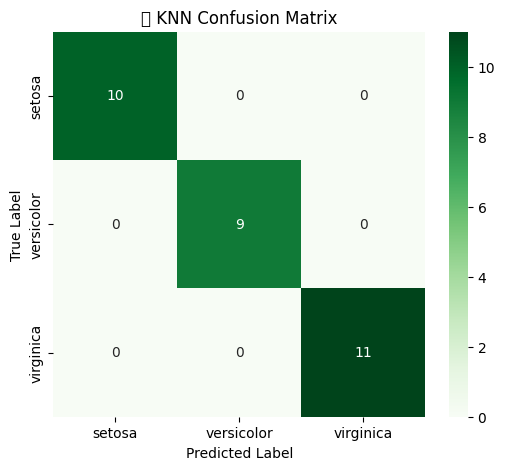

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


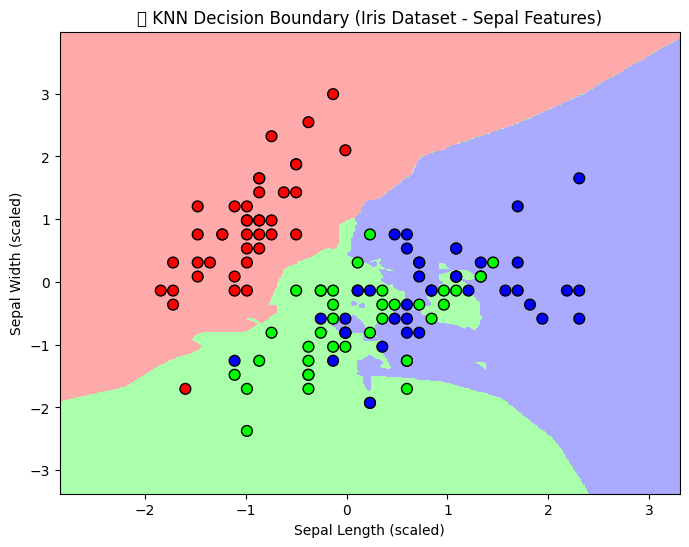

In [ ]:
# ==========================================
# 🌸 K-Nearest Neighbors (KNN) on Iris Dataset
# ==========================================

# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("✅ Iris dataset loaded successfully!")
print("Features:", feature_names)
print("Classes:", target_names)

# Step 3: Split dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Build KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune k
knn.fit(X_train_scaled, y_train)

# Step 6: Make predictions
y_pred = knn.predict(X_test_scaled)

# Step 7: Evaluate model
print("\n🎯 KNN Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# Step 8: Visualize Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Greens",
            xticklabels=target_names, yticklabels=target_names)
plt.title("🌼 KNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Step 9: 2D Decision Boundary Visualization (using first 2 features)
from matplotlib.colors import ListedColormap

X_2D = X[:, :2]  # Only first two features (Sepal length, Sepal width)
X_train2D, X_test2D, y_train2D, y_test2D = train_test_split(X_2D, y, test_size=0.2, random_state=42)

scaler2D = StandardScaler()
X_train2D_scaled = scaler2D.fit_transform(X_train2D)
X_test2D_scaled = scaler2D.transform(X_test2D)

knn2D = KNeighborsClassifier(n_neighbors=5)
knn2D.fit(X_train2D_scaled, y_train2D)

# Create a mesh grid for decision boundary
x_min, x_max = X_train2D_scaled[:, 0].min() - 1, X_train2D_scaled[:, 0].max() + 1
y_min, y_max = X_train2D_scaled[:, 1].min() - 1, X_train2D_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot training points
plt.scatter(X_train2D_scaled[:, 0], X_train2D_scaled[:, 1], c=y_train2D, cmap=cmap_bold, edgecolor='k', s=60)
plt.title("🌸 KNN Decision Boundary (Iris Dataset - Sepal Features)")
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.show()
